In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scGeneFit.functions import *
np.random.seed(0)

In [2]:
#We consider "functional groups" to model the data
#f_groups={functional_group_id: [mean1, mean2, ...], ...} where mean=[gene1,gene2, ...]
f_groups={0:[[0,0], [1,0], [0,1], [1,1]], 1: [[2],[3]], 2: [[0,0], [0,4], [4,0], [4,4]] }

cell_types_aux=[ [s for s in range(len(f_groups[i]))] for i in f_groups.keys()]
all_cell_types=list(itertools.product(*cell_types_aux))

In [3]:
def create_data(f_groups, cell_types, sigma, n, repeat):
  aux=list(f_groups.keys())
  data=np.zeros( (0, sum([len(f_groups[aux[i]][0])*repeat[i] for i in range(len(aux))]) ))
  for cell in cell_types:
    expression=np.zeros((n, 0))
    for t in range(len(cell)):
      mean=f_groups[t][cell[t]]
      mean=np.concatenate([[mean[i]]*repeat[t] for i in range(len(mean))])
      expression=np.concatenate([expression, np.random.multivariate_normal(mean, sigma*np.identity(len(mean)), size=n)], axis=1)
    data=np.concatenate([data, expression])
  labels=np.concatenate([[i]*n for i in range(len(cell_types))])
  return data,labels

Text(0, 0.5, 'synthetic cells')

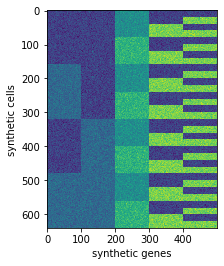

In [4]:
#display all possible cell types
n=20 #20 cells per class
repeat= [100,100,100] #each type of gene appears 100 times (for visualization purposes)
sc_gene, sc_labels=create_data(f_groups, all_cell_types, 0.1, n, repeat)
plt.imshow(sc_gene)
plt.xlabel('synthetic genes')
plt.ylabel('synthetic cells')

Text(0, 0.5, 'synthetic cells')

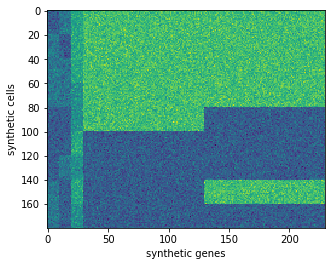

In [5]:
#display data example with 9 classes and 5 relevant markers
cell_types=[(2,1,3), (1,1,3), (3,1,3), (3,0,3), (0,0,2), (0,1,0), (2,0,0), (1,1,1), (1,0,0)]
sc_gene, sc_labels=create_data(f_groups, cell_types, 0.5, n, [10,10,100])
plt.imshow(sc_gene)
plt.xlabel('synthetic genes')
plt.ylabel('synthetic cells')

In [6]:
#Choose an evaluation method (e.g. classification accuracy)
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()

def performance(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

In [7]:
#create data
#optional: generate new data to evaluate performance

X_train, y_train=create_data(f_groups, cell_types, 0.5, n, [10,10,100])
X_test, y_test=create_data(f_groups, cell_types, 0.5, n, [10,10,100])

### Example with optimization with respect to epsilon (centers)

In [8]:
m_range=range(3,12)
epsilon_list=[]
accuracy_list=[]
for m in m_range:
    res=optimize_epsilon(X_train, y_train, X_test, y_test, m, method='centers', fixed_parameters={'redundancy': 0, 'max_constraints': 100}, 
                        bounds=[(0.2 , 10)], x0=[1], max_fun_evaluations=25, n_experiments=10, 
                        clf=clf, verbose=True)
    epsilon_list+=[res[0]]
    accuracy_list+=[res[1]]
    print("best epsilon:", res[0], "accuracy:", res[1])

Optimizing epsilon for 3 markers and centers method.
best epsilon: [1] accuracy: 0.5444444444444444
Optimizing epsilon for 4 markers and centers method.
best epsilon: [1] accuracy: 0.6055555555555554
Optimizing epsilon for 5 markers and centers method.
best epsilon: [1] accuracy: 0.6666666666666667
Optimizing epsilon for 6 markers and centers method.
best epsilon: [1] accuracy: 0.7222222222222222
Optimizing epsilon for 7 markers and centers method.
best epsilon: [1] accuracy: 0.7388888888888889
Optimizing epsilon for 8 markers and centers method.
best epsilon: [1] accuracy: 0.7611111111111111
Optimizing epsilon for 9 markers and centers method.
best epsilon: [2] accuracy: 0.7611111111111111
Optimizing epsilon for 10 markers and centers method.
best epsilon: [1] accuracy: 0.7722222222222223
Optimizing epsilon for 11 markers and centers method.
best epsilon: [1] accuracy: 0.7777777777777778


Text(0, 0.5, 'accuracy')

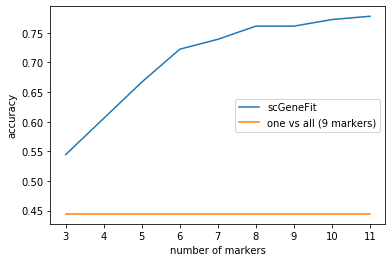

In [9]:
#obtain markers
#one vs all:
markers_ova=one_vs_all_selection(X_train,y_train)
one_vs_all_accuracy=performance(X_train[:,markers_ova], y_train, X_test[:,markers_ova], y_test, clf)

plt.plot(m_range, accuracy_list)+ plt.plot(m_range,[one_vs_all_accuracy for i in accuracy_list])
plt.legend(["scGeneFit", "one vs all (9 markers)"])
plt.xlabel("number of markers")
plt.ylabel("accuracy")

### Example with optimization with respect to epsilon (pairwise constraints)

In [10]:
m_range=range(3,12)
epsilon_list=[]
accuracy_list=[]
for m in m_range:
    res=optimize_epsilon(X_train, y_train, X_test, y_test, m, method='pairwise', 
                        fixed_parameters={'redundancy': 0.1, 'sampling_rate':0.1, 'max_constraints': 200}, 
                        bounds=[(0.1 , 5)], x0=[1], max_fun_evaluations=25, n_experiments=10, 
                        clf=clf, verbose=True)
    epsilon_list+=[res[0]]
    accuracy_list+=[res[1]]
    print("best epsilon:", res[0], "accuracy:", res[1])

Optimizing epsilon for 3 markers and pairwise method.
best epsilon: [4.24962122] accuracy: 0.41166666666666674
Optimizing epsilon for 4 markers and pairwise method.
best epsilon: [2.46005882] accuracy: 0.45777777777777784
Optimizing epsilon for 5 markers and pairwise method.
best epsilon: [0.21439782] accuracy: 0.44333333333333336
Optimizing epsilon for 6 markers and pairwise method.
best epsilon: [2.58122981] accuracy: 0.4538888888888889
Optimizing epsilon for 7 markers and pairwise method.
best epsilon: [0.50942404] accuracy: 0.4538888888888889
Optimizing epsilon for 8 markers and pairwise method.
best epsilon: [0.34392627] accuracy: 0.5044444444444445
Optimizing epsilon for 9 markers and pairwise method.
best epsilon: [0.22386385] accuracy: 0.7066666666666668
Optimizing epsilon for 10 markers and pairwise method.
best epsilon: [0] accuracy: 0.6033333333333334
Optimizing epsilon for 11 markers and pairwise method.
best epsilon: [0.23523667] accuracy: 0.7666666666666666


Text(0, 0.5, 'accuracy')

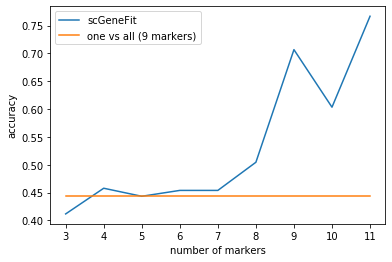

In [11]:
#obtain markers
#one vs all:
markers_ova=one_vs_all_selection(X_train,y_train)
one_vs_all_accuracy=performance(X_train[:,markers_ova], y_train, X_test[:,markers_ova], y_test, clf)

plt.plot(m_range, accuracy_list)+ plt.plot(m_range,[one_vs_all_accuracy for i in accuracy_list])
plt.legend(["scGeneFit", "one vs all (9 markers)"])
plt.xlabel("number of markers")
plt.ylabel("accuracy")